# Assignment 2

Step 1 - determining Cepheid Period-Luminosity Relationship

CURVE_FIT RESULTS:
Best-fitting slope =  -2.3995033357578195 +/- 0.23687245615802194
Best-fitting intercept =  -1.6070933497196447 +/- 0.20611129200078154
Corresponding Chi^2 =  4.1775120815130835
Corresponding Reduced Chi^2 = 0.4641680090570093
0.23687245615802194


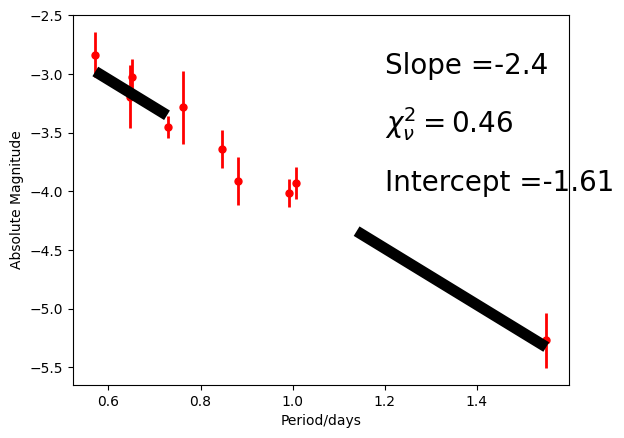

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.optimize as opt

# importing data from MW_Cepheids.dat


parallax, parallax_error, P, m, A, A_error = np.loadtxt("MW_Cepheids.dat",
                                                       unpack=True,
                                                        usecols = (1,2,3,4,5,6))

# calculating d_pc (distance of star from Earth in pc) from parallax

d_pc = [1000/x for x in parallax]
P = np.log10(P)

# calculating absolute magnitude M=m-5*log(d_pc,10)+5-A
M = []
for i in range (0,10):
    mag = m[i]-5*np.log10(d_pc[i])+5-A[i]
    M.append(mag)

# plotting M = a*log(P,10)+b
def func(P, slope, intercept):
    """calculates the model"""
    line = intercept + slope*P
    return line

def chisq(y, sig_M, M_m):
    """takes model, data and error vectors and calculates the chi2"""
    chi2 = np.sum(((M-M_m)**2.0)/(sig_M**2.0))
    return chi2


def hello():
    pass

# simulating errors for absolute magnitude
N_mock = 1000
#N_obs = len(M)
sig_M = np.zeros(len(M))
for i in range(len(M)):
    parallax_mock = np.random.normal(parallax[i],parallax_error[i],N_mock)
    A_mock = np.random.normal(A[i],A_error[i],N_mock)
    d_mock = 1000/parallax_mock
    M_mock = m[i]-5*np.log10(d_mock)+5-A_mock
    sig_M[i] = np.std(M_mock)
    
    
dof = len(P)-1.0 #the number of degrees of freedom; M = 1 -- slope

#get the curve_fit results
start_slope = 5.0 #this is our starting slope for the LM algorithm
start_intercept = -10 #this is our starting intercept for the LM algorithm
best_pars, covar = opt.curve_fit(f=func, xdata=P, ydata=M, 
                                       sigma=sig_M, p0=(start_slope, start_intercept),
                                       absolute_sigma=True)

#let's quickly work out the min chisq
best_slope = best_pars[0]
best_intercept = best_pars[1]
y_best = func(P, best_slope, best_intercept)
best_chi2 = np.sum(((M-y_best)**2.0)/(sig_M**2.0))
best_redc2 = best_chi2/dof

dof = len(P)-1.0 #the number of degrees of freedom; M = 1 -- slope

slope_error = np.sqrt(covar[0, 0])
intercept_error = np.sqrt(covar[1, 1])


print('CURVE_FIT RESULTS:')
print('==================')
print('Best-fitting slope = ', best_slope, "+/-", slope_error)
print('Best-fitting intercept = ', best_intercept, "+/-", intercept_error)
print('Corresponding Chi^2 = ', best_chi2)
print('Corresponding Reduced Chi^2 =', best_redc2)


print(slope_error)


plt.cla()
plt.xlabel('Period/days')
plt.ylabel('Absolute Magnitude')
plt.plot(P, M, color='red', marker='o', markersize=5, linestyle="None")
plt.errorbar(P, M, yerr=sig_M, color="red", linewidth=2, linestyle="None")
plt.plot(P, y_best, color='black', marker="None", linewidth=8, linestyle='-', dashes=[20,20])
c2string = r'$\chi_\nu^2 =$' +  str(np.round(best_redc2, 2))
plt.text(1.2, -3.5, c2string, fontsize=20)
sstring = 'Slope =' +  str(np.round(best_slope, 2))
plt.text(1.2, -3, sstring, fontsize=20)
istring = 'Intercept =' +  str(np.round(best_intercept, 2))
plt.text(1.2, -4, istring, fontsize=20)
plt.show()



Step 2 - Distance of a Nearby Galaxy

In [9]:
import numpy as np

#importing data from ngc4527_cepheids.dat - tell them to change this bit
logP, m = np.loadtxt("ngc4527_cepheids.dat",\
                         unpack=True,\
                         usecols=(1,2))
a = best_slope
b = best_intercept


d_pc = 10**(((a*logP)+b-m-5+0.0682)/-5)/(10**6)
d_pc = np.delete(d_pc,6)
d_pc=np.average(d_pc)
a_error = slope_error
b_error = intercept_error
d_pc_error = np.sqrt(a_error**2 + b_error**2)

print ("Distance (megaparsecs)=", d_pc,"+/-", d_pc_error)

Distance (megaparsecs)= 13.887521583090049 +/- 0.3139911227671341


Step 3 - The Hubble Constant

According to NGC4527, Hubble Constant = 82.77920108789304
[ 427. 1510. 1152. 1152. 1152.  170.  303.]
[ 687.76029224 1466.44453433  942.87208203 1003.68361332 1375.2272374
  207.20087427  240.57305607]
CURVE_FIT RESULTS:
Best-fitting slope =  74.16040400835534 +/- 0.23923284398888398
Best-fitting intercept =  -64.22620440258419 +/- 0.20799636463723417
Corresponding Chi^2 =  5651706.294973798
Corresponding Reduced Chi^2 = 627967.3661081998


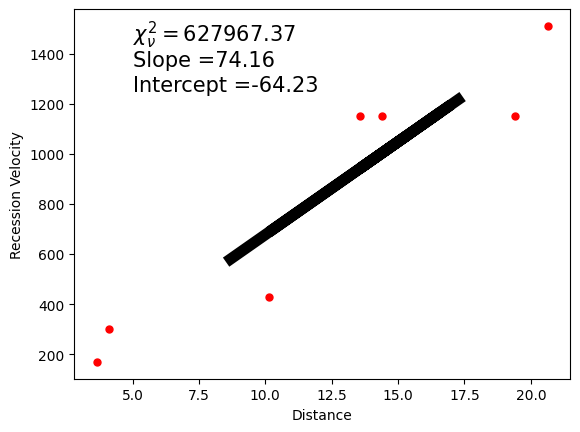

In [6]:
#Hubble constant from ng4527
H_0 = 1152/(d_pc)
print ("According to NGC4527, Hubble Constant =", H_0)

#Hubble constant from other galaxies

#import other_galaxies.dat
r, d, d_error = np.loadtxt("other_galaxies.dat",\
                                                 unpack=True,\
                                                 usecols=(1,2,3))


def func(d, slope, intercept):
    """calculates the model"""
    line = intercept + slope*d
    return line

def chisq(r, sig_r, r_m):
    """takes model, data and error vectors and calculates the chi2"""
    chi2 = np.sum(((r-r_m)**2.0)/(sig_r**2.0))
    return chi2

# simulating errors
N_mock = 1000
#N_obs = len(M)
sig_r = np.zeros(len(r))
for i in range(len(r)):
    parallax_mock = np.random.normal(parallax[i],parallax_error[i],N_mock)
    A_mock = np.random.normal(A[i],A_error[i],N_mock)
    M_mock = m[i]-5*np.log10(d_mock)+5-A_mock
    sig_r[i] = np.std(M_mock)
    
    
dof = len(P)-1.0 #the number of degrees of freedom; M = 1 -- slope

#get the curve_fit results
start_slope = 5.0 #this is our starting slope for the LM algorithm
start_intercept = -10 #this is our starting intercept for the LM algorithm
best_pars, dummy = opt.curve_fit(f=func, xdata=d, ydata=r, 
                                       sigma=sig_r, p0=(start_slope, start_intercept),
                                       absolute_sigma=True)

#let's quickly work out the min chisq
best_slope = best_pars[0]
best_intercept = best_pars[1]
r_best = func(d, best_slope, best_intercept)
print (r)
print (r_best)
best_chi2 = np.sum(((r-r_best)**2.0)/(sig_r**2.0))
best_redc2 = best_chi2/dof



dof = len(P)-1.0 #the number of degrees of freedom; M = 1 -- slope

print('CURVE_FIT RESULTS:')
print('==================')
print('Best-fitting slope = ', best_slope, "+/-", slope_error)
print('Best-fitting intercept = ', best_intercept, "+/-", intercept_error)
print('Corresponding Chi^2 = ', best_chi2)
print('Corresponding Reduced Chi^2 =', best_redc2)

slope_error = np.sqrt(covar[0, 0])
intercept_error = np.sqrt(covar[1, 1])

plt.cla()
plt.xlabel('Distance')
plt.ylabel('Recession Velocity')
plt.plot(d, r, color='red', marker='o', markersize=5, linestyle="None")
plt.errorbar(d, r, yerr=sig_r, color="red", linewidth=2, linestyle="None")
plt.plot(d, r_best, color='black', marker="None", linewidth=8, linestyle='-', dashes=[20,20])
c2string = r'$\chi_\nu^2 =$' +  str(np.round(best_redc2, 2))
plt.text(5, 1450, c2string, fontsize=15)
sstring = 'Slope =' +  str(np.round(best_slope, 2))
plt.text(5, 1350, sstring, fontsize=15)
istring = 'Intercept =' +  str(np.round(best_intercept, 2))
plt.text(5, 1250, istring, fontsize=15)
plt.show()